<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import factorial
from matplotlib.pyplot import plot
from IPython import display


#Combinations
Given a set of n items how many distinct subsets of size k can you form? Order does not matter.

EX: How many ways can you get 2 heads when tossing a coin 3 times?

Spoken as "n choose k"  

Written as 
$n \choose k$ = $ \frac{n!}{k! (n-k)!}$

So for the example, $ 3 \choose 2$ = $ \frac 6 2 $ = 3

{HHT, HTH, THH}

Note: The "order does not matter" followed by an example where the order or position of the T seems to be the only difference seems contradictory. The most coherent explanation I have found is [combinations and permutations in coin tossing](https://math.stackexchange.com/questions/1243182/combinations-and-permutations-in-coin-tossing)

In [0]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

# Binomial Distribution
Given n binary trials, what is the probability of k successes assuming that the probability of success in a single trial is p?

If you got all of the successes first and then all of the failures the probability would be $ p^k (1-p)^{(n-k)}$   

But the successes don't have to come first, there are many ways that we can get k successes in n trials. Specifically, there are $ n \choose k $ ways.

So, if the probability of success in a single trial is p then the total probability of k successes in n trials is:

Binomial = ${n \choose k} p^k (1-p)^{(n-k)}$

In [0]:
def binomial(n,p):
  def distribution(k):
    return comb(n, k) * p**k * (1-p)**(n-k)

  return distribution

## Examples

In [0]:
# n = 7, p = 1/5
p = binomial(7,1/5)

In [5]:
# Probability of at least 2 successes
sum([p(k) for k in range(2,8)])

0.4232832000000002

In [0]:
# n = 25, p = 1/10
p2 = binomial(25,1/10)


In [7]:
# Probability of at least 2 successes
sum([p2(k) for k in range(2,26)])

0.7287940935386341

# Working Backwards from data
Given a sample outcome, what can we learn about the single trial probability of success?

EX: If we had 60 heads in 100 trials what does that tell us about a single throw?

We generate a new function that takes the single trial probability as an argument and answers with the probabilty of getting the given number of successes in the given number of trials.



In [0]:
def binomial_p(n,k):
  def distribution(single_trial_p):
    return comb(n, k) * single_trial_p**k * (1-single_trial_p)**(n-k)

  return distribution

In [0]:
num_points = 200
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

Each dot indicates how likely the 60 successes in 100 trials is at the specified probability of a success in a single trial


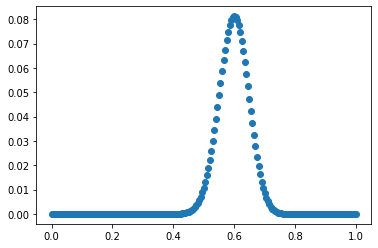

In [10]:
binomial_100_60 = binomial_p(100, 60)
probabilities = [binomial_100_60(p) for p in trial_ps]
plot(trial_ps, probabilities, 'o')
area_under_curve = sum(probabilities)
print('Each dot indicates how likely the 60 successes in 100 trials is at the specified probability of a success in a single trial')


Note: The shape is useful, but this is not a pmf - it doesn't sum to 1.


In [11]:
print('approximate area under curve', area_under_curve)

approximate area under curve 1.9801980198019804


area under normalized curve 0.9999999999999999


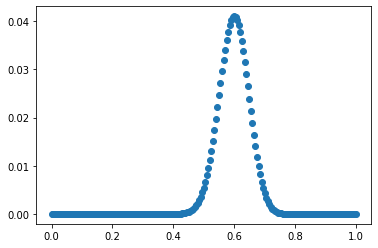

In [12]:
normalized_probabilities = [p/area_under_curve for p in probabilities]
plot(trial_ps, normalized_probabilities, 'o')
print('area under normalized curve', sum(normalized_probabilities))


If our goal is the normalized distribution or pmf then we are doing extra work - each value is scaled up by the ${n \choose k} $ then scaled by the sum of all of the values.   

The shape of the curve is entirely determined by $p^k (1-p)^{(n-k)}$

I wouldn't believe me either, let's try it out...

In [0]:
def simplified_binomial_p(n,k):
  def distribution(p):
    return p**k * (1-p)**(n-k)

  return distribution

approximate area under curve 1.4405385495391127e-28
approximate area under normalized curve 0.9999999999999999


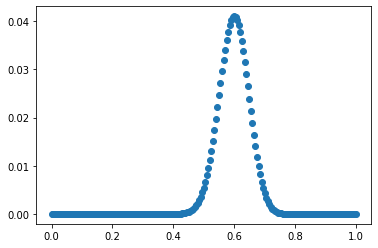

In [14]:
simplified_binomial_100_60 = simplified_binomial_p(100, 60)
simplified_probabilities = [simplified_binomial_100_60(p) for p in trial_ps]
area_under_simplified_curve = sum(simplified_probabilities)
normalized_simplified_probablities = [p/area_under_simplified_curve for p in simplified_probabilities]

print('approximate area under curve', area_under_simplified_curve)
print('approximate area under normalized curve', sum(normalized_probabilities))

plot(trial_ps, normalized_simplified_probablities, 'o')


In [15]:
print(normalized_probabilities[100], normalized_simplified_probablities[100])

0.005476152689377183 0.005476152689377183
